## *Problemin Açiklamasi*

Banka ve Kredi Kuruluşlarının temerrüde düşme ihtimali olan kişilere kredi vermemelerini sağlamak önemlidir.

Home Equity veri seti, geçmişte verilen yaklaşık besbindokuzyuzaltmis kredi için home equity ile ilgili bilgileri içermektedir. Bu veriler, müşterinin kredi anındaki durumuna ilişkin çeşitli bilgiler ve ayrıca müşterinin daha sonra krediyi temerrüde düşürüp düşürmediğini gösteren bir 'BAD' sütunu içerir.

Bu veri setini 'BAD' değişkeni ile birlikte, bir kişinin mevcut durumuna dayanarak gelecekte krediyi temerrüde düşürme olasılığını tahmin etmemize yardımcı olacak makine öğrenimi modellerini eğitmek için kullanabiliriz.

Bu not defteri, Home Equity veri setinin bir analizini sunmakta ve mevcut durumlarını analiz ederek temerrüde düşebilecek kişileri tahmin etmek için kullanılacak en iyi modeli önermektedir. Model, bir kişinin temerrüde düşüp düşmeyeceğini tahmin edeceğinden, bu problem ikili sınıflandırma problemi olarak kategorize edilebilir.


## *Hipotez Oluşturma*
BAD'yi (bu kredi temerrüdü sorunu için hedef değişken) etkileyebilecek faktörlerden bazıları şunlardır:


**Kredi miktarı:** Talep edilen kredi miktarı daha az olan başvuru sahiplerinin gelecekteki kredilerinde temerrüde düşmeme şansı daha yüksek olmalıdır

**Vadesi gelen ipotek:** İpotek üzerinde daha az miktar kalan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme şansı daha yüksek olmalıdır

**Mevcut mülkün değeri:** Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme şansı daha az olmalıdır

**Sebep:** Kredinin alınma nedeni de temerrüde düşme olasılığı üzerinde etkili olabilir

**Temerrüde düşmüş kredi sayısı:** Bir kişi geçmişte birkaç kez temerrüde düşmüşse, temerrüt olasılığı daha yüksek olacaktır

**Kredi limiti yaşı:** Bu, onaylanan en eski kredinin yaşını gösterir ve bu ne kadar eski olursa müşterinin temerrüde düşme olasılığı o kadar az olacaktır.

**Borcun gelire oranı:** Bir kişinin gelirine oranla yüksek borcu varsa, o kişinin daha fazla borcu geri ödemesi zor olacaktır, bu nedenle bu oranın yüksek olması temerrüde düşüldüğünü gösterir.

**Gerçeğe aykırı rapor sayısı:** Gerçeğe aykırı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi bir sayı gelecekte temerrüde düşme olasılığının yüksek olduğunu göstermelidir.



Verileri anlama ve Kutuphaneyi iceri aktarma
==

In [1]:
#import the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from statistics import mean, stdev
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_validate, StratifiedKFold
from sklearn.svm import SVC

df=pd.read_csv('hmeq.csv') #import the dataset
columnNames = pd.Series(df.columns.values) # to check the columns/variables/features present in our data set

In [3]:
df.head(10) #first 10 rows of dataset


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
df.shape #to look at the shape of the dataset

(5960, 13)

It shows that the dataset has 5960 rows(observations) and 13 columns (variables/features)

Veri kümesinin 5960 satır (gözlem) ve 13 sütun (değişkenler/özellikler) olduğunu gösterir.

In [6]:
# descriptive statistics
description= df.describe(include='all') # to get frequency distribution of all the categorical columns and the basic summary of all the numeric columns
description

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [7]:
data_types=df.dtypes #to print data types for each variable
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

Missing Values - Kayıp değerler
==

In [7]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') # the isnull() returns 1 if the value is null
MissingData

,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


In [8]:
#dropping rows that have missing data
df.dropna(axis=0, how='any', inplace=True)
df


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Exploratory Data Analysis (EDA)
==

**Univariate Analysis**

In this analysis we examine each variable individually. For categorical features we can use bar plots which calculates the total count of each category in a particular variable. For numerical features we can use histograms or probability density plots to look at the distribution of the variable.

**Tek Değişkenli Analiz**

Bu analizde her bir değişkeni ayrı ayrı inceleriz. Kategorik özellikler için, belirli bir değişkendeki her bir kategorinin toplam sayısını hesaplayan çubuk grafikleri kullanabiliriz. Sayısal özellikler için değişkenin dağılımına bakmak üzere histogramları veya olasılık yoğunluk grafiklerini kullanabiliriz.

<Axes: title={'center': 'BAD'}>

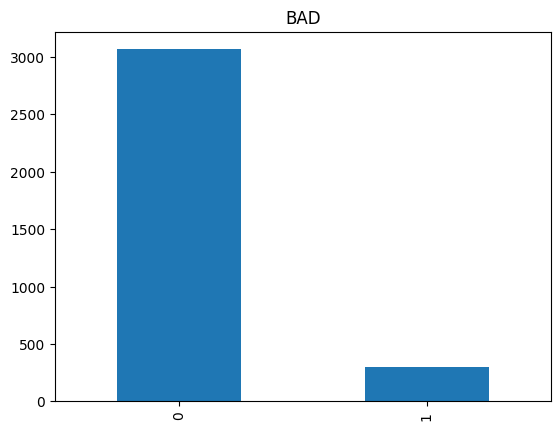

In [14]:
#Frequency distribution of target variable "BAD" and visualizing the target variable
df["BAD"].value_counts().plot.bar(title='BAD')

It shows that 20% are defaulters and 80% are non defulters

%20'sinin temerrüde düştüğünü ve %80'inin kusurlu olmadığını gösteriyor

<Axes: title={'center': 'REASON'}>

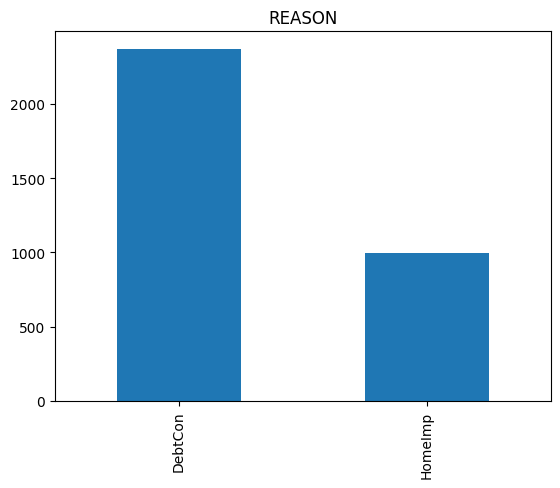

In [9]:
#visualizing the categorical variable REASON
REASON_count= df["REASON"].value_counts().rename_axis('REASON').reset_index(name='Total Count')
df["REASON"].value_counts().plot.bar(title='REASON')


<Axes: title={'center': 'JOB'}>

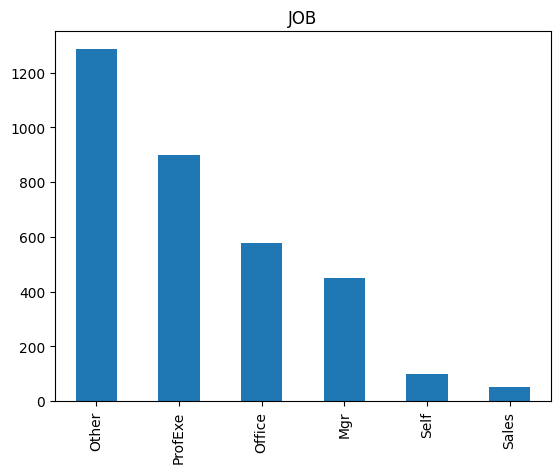

In [10]:
#visualizing the categorical variable JOB
JOB_count= df["JOB"].value_counts().rename_axis('JOB').reset_index(name='Total Count')
df["JOB"].value_counts().plot.bar(title='JOB')

<ipython-input-12-bebd3cac4d61>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["LOAN"] , color="navy", ax=axes[0, 0])
<ipython-input-12-bebd3cac4d61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["DEBTINC"] , color="violet", ax=axes[0, 1])
<ipython-input-12-bebd3cac4d61>:5: UserWarn

<Axes: xlabel='DELINQ', ylabel='Density'>

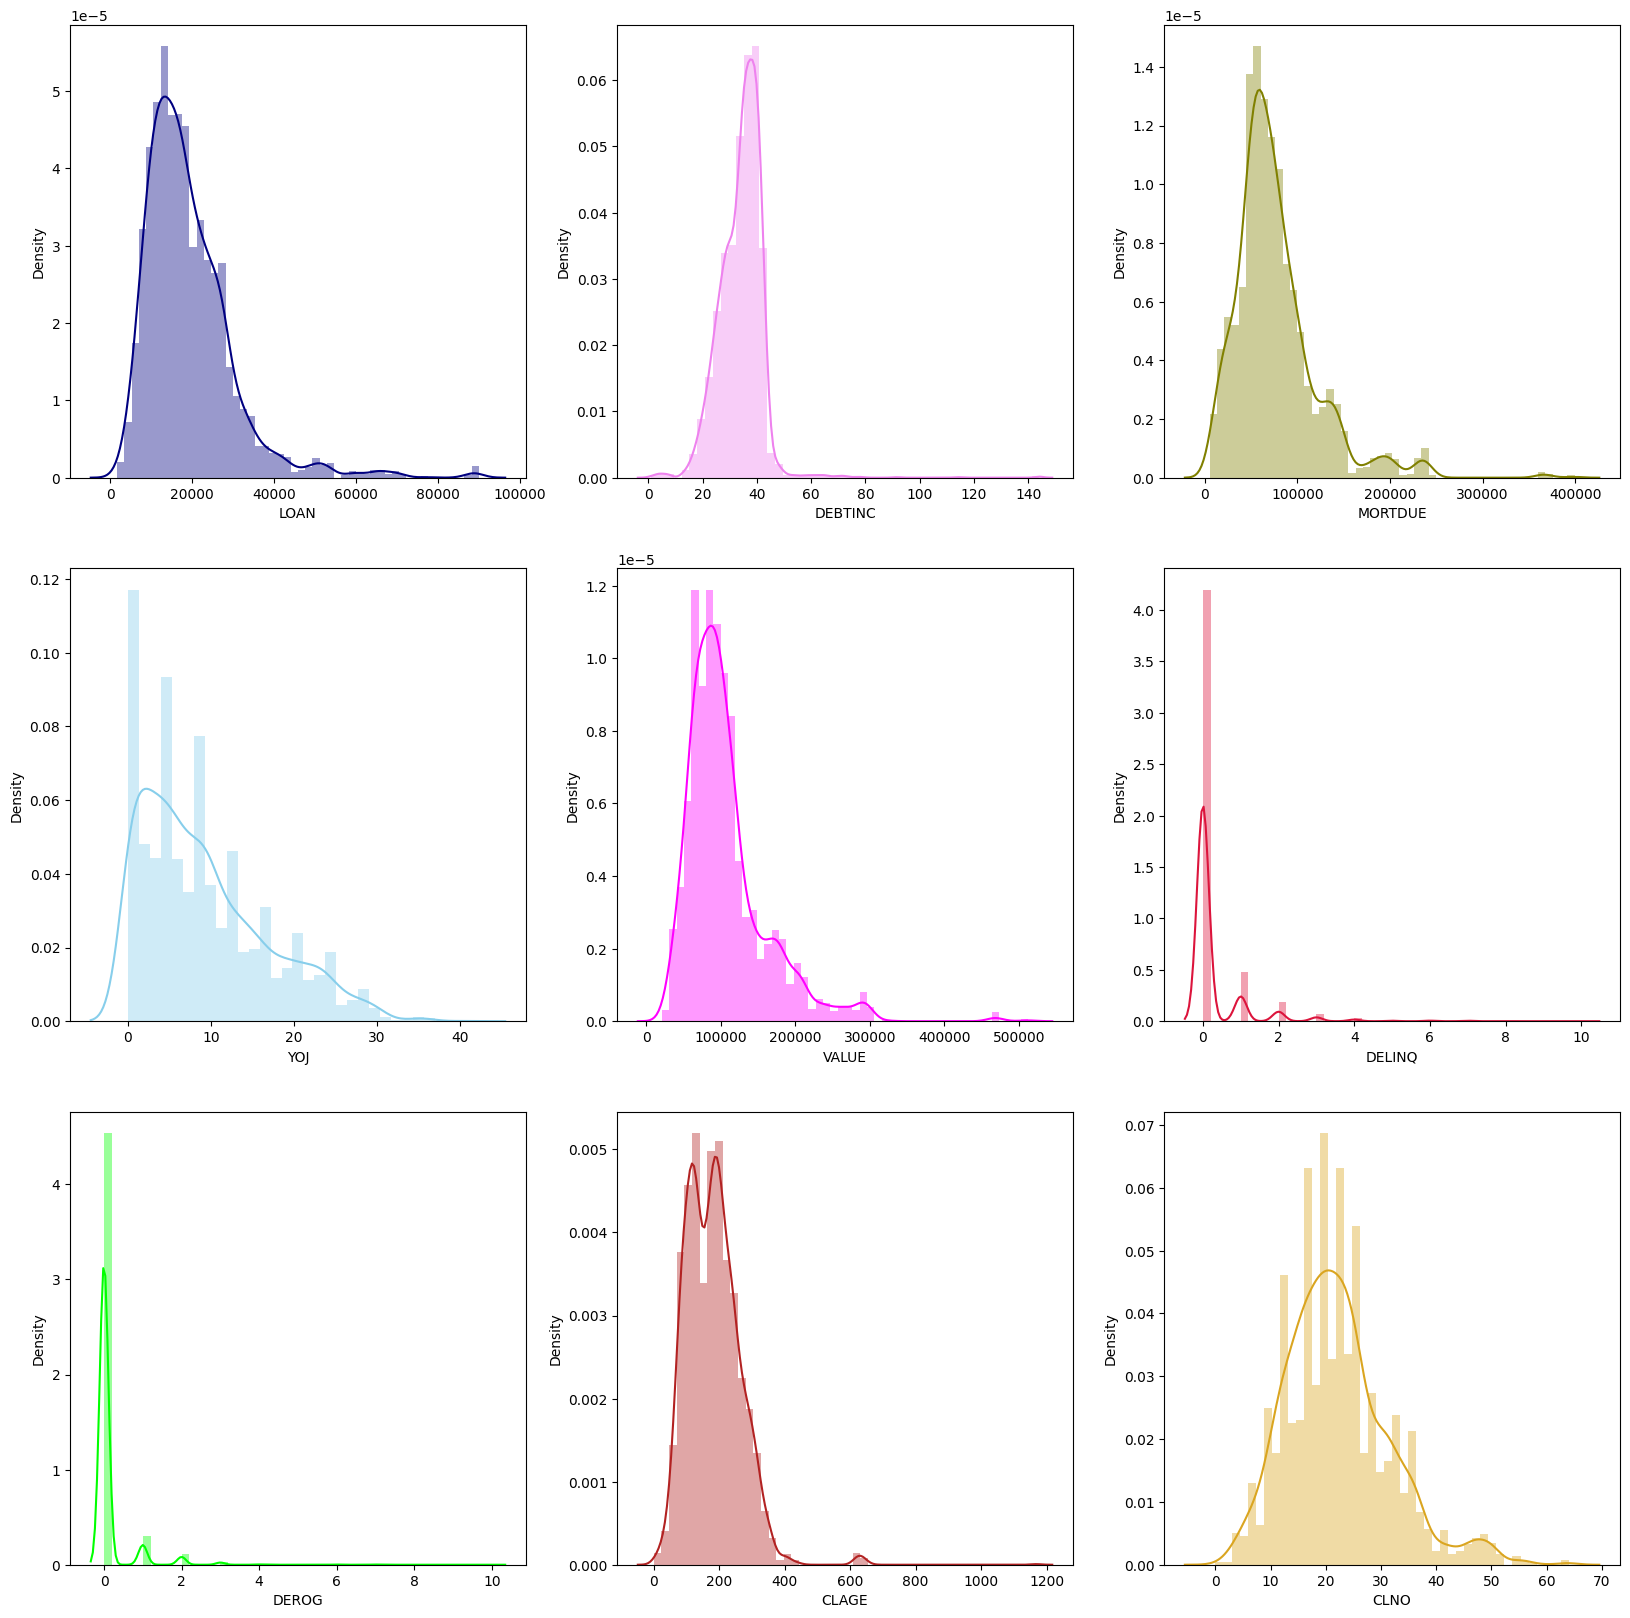

In [12]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(3, 3, figsize=(20,20))
sns.distplot( df["LOAN"] , color="navy", ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="violet", ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="olive", ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="skyblue", ax=axes[1, 0])
sns.distplot( df["CLAGE"] , color="firebrick", ax=axes[2, 1])
sns.distplot( df["CLNO"] , color="goldenrod", ax=axes[2, 2])
sns.distplot( df["DEROG"] , color="lime", ax=axes[2, 0])
sns.distplot( df["VALUE"] , color="magenta", ax=axes[1, 1])
sns.distplot( df["DELINQ"] , color="crimson", ax=axes[1, 2])

**Bivariate Analysis**

In this analysis we explore the relationship of each variable with respect to the target variable. We can also check our hypothesis using bivariate analysis.

**Iki Degiskenli Analiz**

Bu analizde, her değişkenin hedef değişkene göre ilişkisini araştırıyoruz. Hipotezimizi iki değişkenli analiz kullanarak da kontrol edebiliriz.

**Categori and Target Variable Relationship** - **Kategori ve Hedef Değişken İlişkisi **

<Axes: title={'center': 'JOB vs BAD'}, xlabel='JOB'>

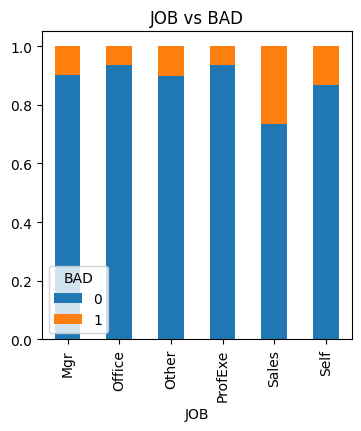

In [13]:

JOB=pd.crosstab(df['JOB'],df['BAD'])
JOB.div(JOB.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='JOB vs BAD', figsize=(4,4))


<Axes: title={'center': 'REASON vs BAD'}, xlabel='REASON'>

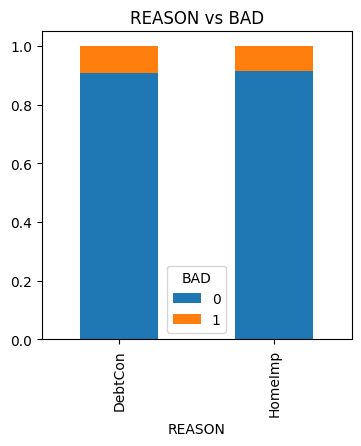

In [14]:
REASON=pd.crosstab(df['REASON'],df['BAD'])
REASON.div(REASON.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='REASON vs BAD', figsize=(4,4))

**Numeric and Target Variable Relationship** -**Sayısal ve Hedef Değişken İlişkisi**

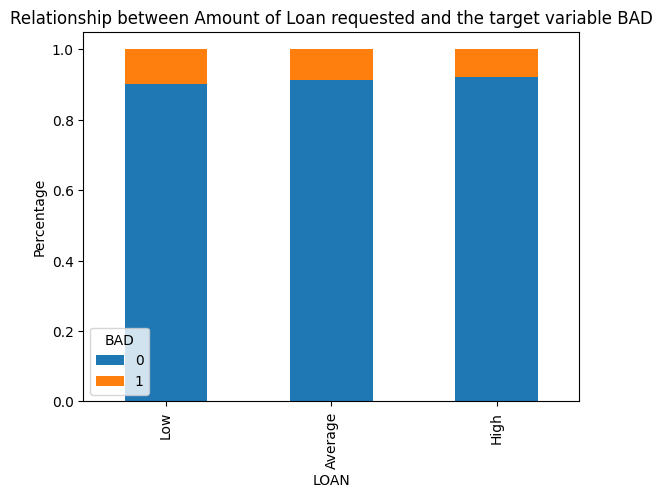

In [16]:

dfWithBin = df.copy()
bins=[0,15000,25000,90000]
group=['Low','Average','High']
dfWithBin['LOAN_bin']=pd.cut(df['LOAN'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['LOAN_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship between Amount of Loan requested and the target variable BAD')
plt.xlabel('LOAN')
P= plt.ylabel('Percentage')

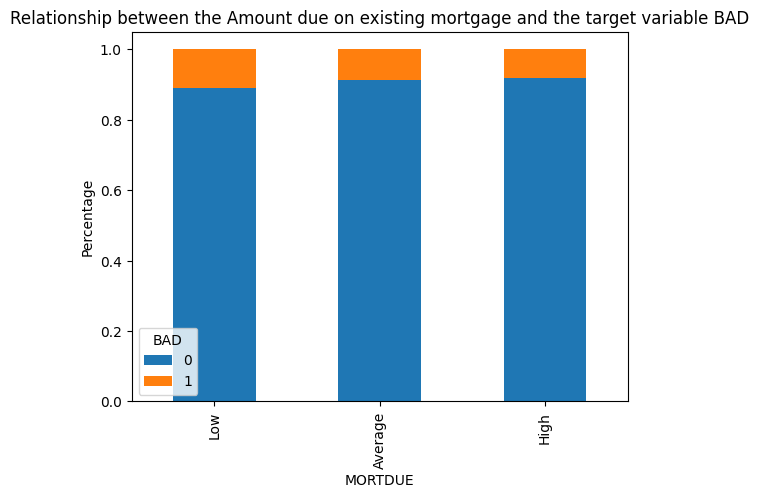

In [17]:
bins=[0,47000,92000,400000]
group=['Low','Average','High']
dfWithBin['MORTDUE_bin']=pd.cut(dfWithBin['MORTDUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['MORTDUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship between the Amount due on existing mortgage and the target variable BAD')
plt.xlabel('MORTDUE')
P= plt.ylabel('Percentage')

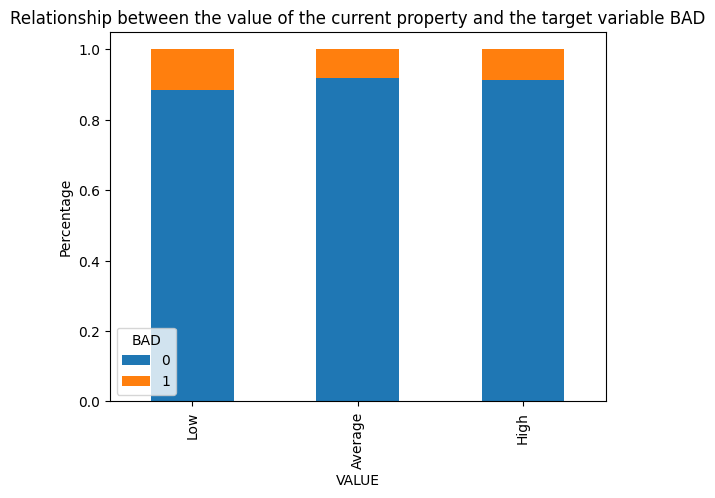

In [18]:
bins=[0,68000,120000,860000]
group=['Low','Average','High']
dfWithBin['VALUE_bin']=pd.cut(dfWithBin['VALUE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['VALUE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship between the value of the current property and the target variable BAD')
plt.xlabel('VALUE')
P= plt.ylabel('Percentage')

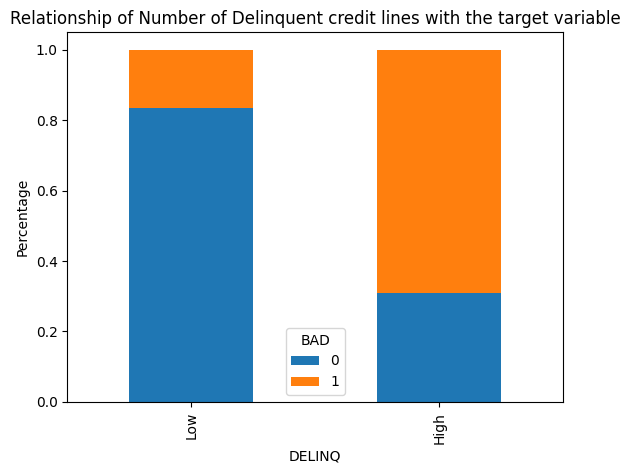

In [19]:
bins=[0,3,15]
group=['Low','High']
dfWithBin['DELINQ_bin']=pd.cut(dfWithBin['DELINQ'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship of Number of Delinquent credit lines with the target variable')
plt.xlabel('DELINQ')
P= plt.ylabel('Percentage')

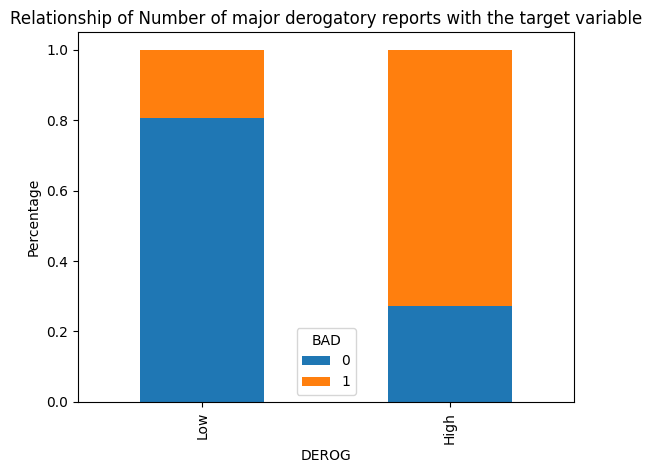

In [20]:
bins=[0,2,15]
group=['Low','High']
dfWithBin['DEROG_bin']=pd.cut(dfWithBin['DEROG'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DEROG_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship of Number of major derogatory reports with the target variable')
plt.xlabel('DEROG')
P= plt.ylabel('Percentage')

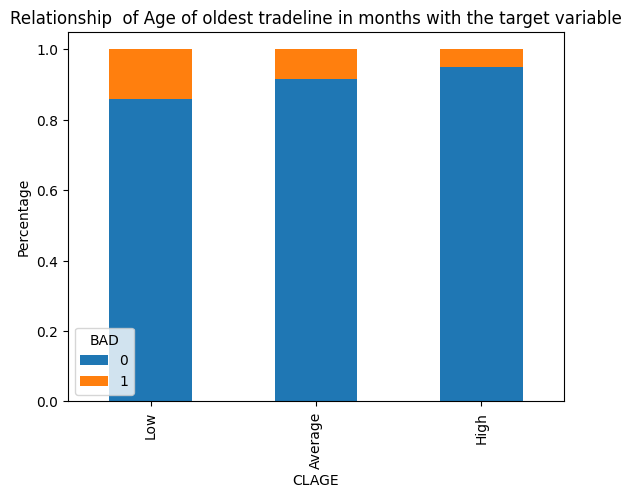

In [21]:
bins=[0,120,230,1170]
group=['Low','Average','High']
dfWithBin['CLAGE_bin']=pd.cut(dfWithBin['CLAGE'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['CLAGE_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship  of Age of oldest tradeline in months with the target variable')
plt.xlabel('CLAGE')
P= plt.ylabel('Percentage')

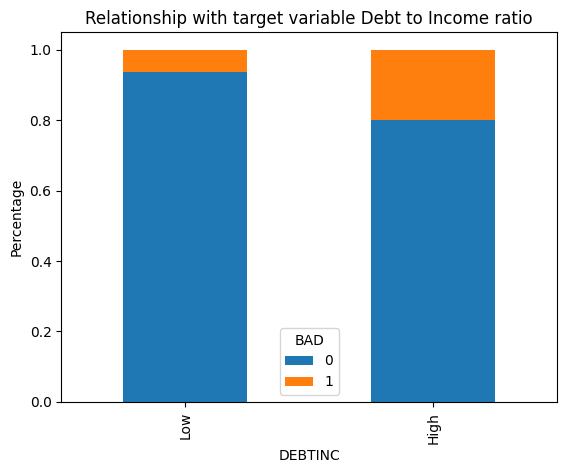

In [22]:
bins=[0,40,204]
group=['Low','High']
dfWithBin['DEBTINC_bin']=pd.cut(dfWithBin['DEBTINC'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DEBTINC_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Relationship with target variable Debt to Income ratio')
plt.xlabel('DEBTINC')
P= plt.ylabel('Percentage')

These stacked bar plots show:

* The proportion of defaulters or non defaulters in each category of categorical variables
* There is nothing significant that we can infer from the number of defaulters having a different reason for taking out loan
The proportion for defaulters having Sales job is higher


Bu yığılmış çubuk grafikleri sunlari göstermektedir:

* Kategorik değişkenlerin her bir kategorisinde temerrüde düşenlerin veya düşmeyenlerin oranı
* Temerrüde düşenlerin sayısının kredi almak için farklı bir nedene sahip olmasından çıkarabileceğimiz önemli bir şey yoktur
* Temerrüde düşenlerin Satış işine sahip olma oranı daha yüksektir


<ipython-input-25-4b4ba43a9bc6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


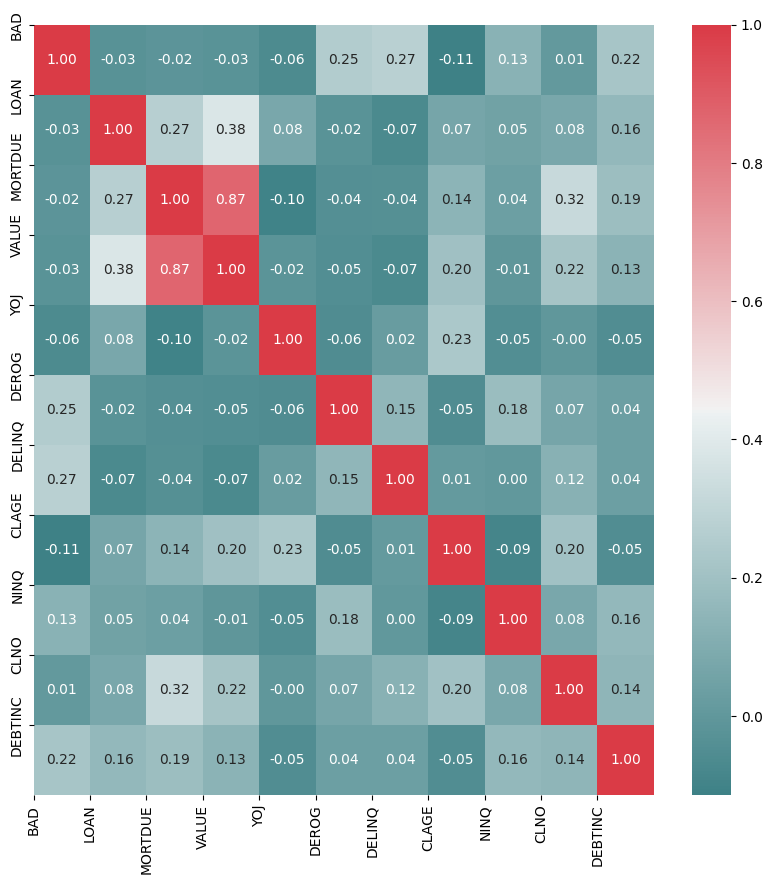

In [25]:
#Now Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(200, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

This correlation matrix shows the correlation between all the numeric variables.

The interesting correlation that we can see is that BAD (target variable) is positively correlated with DELINQ, DEROG and DEBTINC

Bu korelasyon matrixsi, tüm sayısal değişkenler arasındaki korelasyonu gösterir. Görebildiğimiz  ve ilginç olan korelasyon, BAD'nin (hedef değişken) DELINQ, DEROG ve DEBTINC ile pozitif korelasyon göstermesidir.

Data Preprocessing - Veri Ön İşleme
==

**Encoding**

As many of the Machine Learning models takes only the numerical values as input so we have to convert categorical columns to numeric
Dummy variable turns categorical variables into a series of 0 and 1, making them much easier to compare

**Kodlama**

Makine Öğrenimi modellerinin çoğu girdi olarak yalnızca sayısal değerleri aldığından, kategorik sütunları sayısal hale dönüştürmemiz gerekir Kukla değişken, kategorik değişkenleri bir dizi 0 ve 1'e dönüştürerek karşılaştırmayı çok daha kolay hale getirir

In [26]:
#encoding
df=pd.get_dummies(df, columns=['REASON','JOB'])
df


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


 We can use scikit-learn (sklearn) for making different models. It requires the target variable in a separate dataset

 Farklı modeller yapmak için scikit-learn (sklearn) kullanabiliriz. Hedef değişkenin ayrı bir veri kümesinde olmasını gerektirir

In [27]:
# Extract independent and target variables
X = df.drop(['BAD'], axis=1)
y = df['BAD']

**Data Normalization**

some of the columns in X have large variance in the numeric data in them so standard scaling is done to normalize them

**Veri Normalizasyonu**

X'teki bazı sütunların içindeki sayısal verilerde büyük varyans vardır, bu nedenle bunları normalleştirmek için standart ölçeklendirme yapılır

In [28]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

## ***1. Model : Logistic Regression***

Lojistik regresyon modeli, sınıflandırma tekniklerinden biridir ve hedef değişkenin ikili olduğu, örneğin temerrüt / temerrüt değil, dolandırıcılık / dolandırıcılık değil gibi yalnızca iki değere sahip olduğu bir regresyon modeli türü olarak tanımlanır. lojistik regresyonda, ikili bir sonucun olasılığı tahmin edilir.
Lojistik regresyon modelini oluşturmak için veri kümesi eğitim ve test olarak ikiye ayrılmıştır. Ayrıca tüm veri kümesini k-katlarına rastgele bölmek için KFold çapraz doğrulama kullanılmıştır

Feature Selection using RFE for Logistic Regression Model -
Lojistik Regresyon Modeli için RFE Kullanarak Özellik Seçimi

Özellik seçimi, veride hedef niteliğin tahmin edilmesine en fazla katkıda bulunan özelliklerin seçilmesi işlemidir. Recursive Feature Elimination (RFE) yöntemi bir özellik seçimi yaklaşımıdır. Öznitelikleri özyinelemeli olarak kaldırarak ve kalan öznitelikler üzerinde bir model oluşturarak çalışır. Bazı faydaları şunlardır:
* Aşırı uyumu azaltır
* Doğruluğu artırır
* Eğitim süresini kısaltır



In [30]:
#RFE with the logistic regression algorithm to select the top 4 features.
#import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=4)
#rfe = RFE(model, 4)
fit = rfe.fit(X, y)
no_of_features = fit.n_features_
support_features = fit.support_
ranking_features = fit.ranking_
print("Num Features: %d" % (no_of_features))
print("Selected Features: %s" % (support_features))
print("Feature Ranking: %s" % (ranking_features))
X_sub = X.iloc[:,support_features] #updated X with the top 4 features

Num Features: 4
Selected Features: [False False False False  True  True  True False False  True False False
 False False False False False False]
Feature Ranking: [ 6  8  7 10  1  1  1  4  3  1 11 14 12  2 13 15  5  9]


RFE ilk 4 özelliği/bağımsız değişkeni şu şekilde döndürür: DEROG,DELINQ,CLAGE,DEBTINC

Bu nedenle, X= DEROG,DELINQ,CLAGE,DEBTINC Y= BAD

Random Forest modelinde ve Decision Tree de değişken/özellik seçimi, verilerin en önemli özelliklerine göre üst düğümlerin bölünmesiyle otomatik olarak yapılır

Performance/Evaluation metrics of the models

Modellerin Performans/Değerlendirme metrikleri
==

**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. A confusion matrix for binary classification shows the four different outcomes: true positive, false positive, true negative, and false negative. The actual values form the columns, and the predicted values (labels) form the rows.

**Karışıklık Matrisi**

Karışıklık matrisi, bir sınıflandırma problemine ilişkin tahmin sonuçlarının bir özetidir. İkili sınıflandırma için bir karışıklık matrisi dört farklı sonucu gösterir: doğru pozitif, yanlış pozitif, doğru negatif ve yanlış negatif. Gerçek değerler sütunları, tahmin edilen değerler (etiketler) ise satırları oluşturur.


**Accuracy**

•	True Positive - Targets which are actually true(Y) and we also predicted them true(Y)
•	True Negative - Targets which are actually false(N) and we also predicted them false(N)
•	False Positive - Targets which are actually false(N) but we predicted them true(T)
•	False Negative - Targets which are actually true(T) but we predicted them false(N)
We can calculate the accuracy of the model using these values of confusion matrix. The accuracy is given by:

Accuracy= TP + TN / (TP + TN + FP + FN)

**Doğruluk**

- Gerçek Pozitif - Gerçekte doğru olan (Y) ve bizim de doğru olduğunu tahmin ettiğimiz (Y) hedefler
- Gerçek Negatif - Aslında yanlış olan(N) ve bizim de yanlış olduğunu tahmin ettiğimiz hedefler(N)
- Yanlış Pozitif - Aslında yanlış olan (N) ancak bizim doğru tahmin ettiğimiz hedefler (T)
- Yanlış Negatif - Aslında doğru olan (T) ancak bizim yanlış tahmin ettiğimiz hedefler (N)
Karışıklık matrisinin bu değerlerini kullanarak modelin doğruluğunu hesaplayabiliriz. Doğruluk şu şekilde verilir:

Doğruluk= TP + TN / (TP + TN + FP + FN)

**Precision **

Precision is a measure of correctness achieved in true prediction i.e. it calculates out of observations labeled as true, how many of them are actually true.Precision is a good measure to determine, when the costs of False Positive is high.

Precision = TP / (TP + FP)

**Hassasiyet **

Kesinlik, doğru tahminde elde edilen doğruluğun bir ölçüsüdür, yani doğru olarak etiketlenen gözlemlerden kaçının gerçekten doğru olduğunu hesaplar. Kesinlik, Yanlış Pozitif maliyetleri yüksek olduğunda belirlemek için iyi bir ölçüdür.

Kesinlik = TP / (TP + FP)

**Recall**

Recall is a measure of actual observations which are predicted correctly i.e. it calculates how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. Precision is a good measure to determine, when the costs of False Positive is high.

Recall = TP / (TP + FN)

**Geri Cagirma**

Geri çağırma, doğru tahmin edilen gerçek gözlemlerin bir ölçüsüdür, yani gerçek sınıfa ait kaç gözlemin doğru etiketlendiğini hesaplar. 'Duyarlılık' olarak da bilinir. Kesinlik, Yanlış Pozitif maliyetleri yüksek olduğunda belirlemek için iyi bir ölçüdür.

Geri Çağırma = TP / (TP + FN)

**Specificity**

Specificity is a measure of how many observations of false class are labeled correctly.

Specificity = TN / (TN + FP)

Specificity and Sensitivity both plays an important role in deriving ROC curve.

**Özellik**

Özgüllük, yanlış sınıfa ait kaç gözlemin doğru etiketlendiğinin bir ölçüsüdür.

Özgüllük = TN / (TN + FP)

Özgüllük ve Duyarlılık, ROC eğrisinin türetilmesinde önemli bir rol oynar.

**ROC curve**

Receiver Operating Characteristic(ROC) summarizes the model’s performance by calculating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC) also called concordance index is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

**ROC eğrisi**

Alıcı İşletim Karakteristiği (ROC), gerçek pozitif oranı (duyarlılık) ve yanlış pozitif oranı (1-özgüllük) arasındaki değiş tokuşları hesaplayarak modelin performansını özetler.
Uyum indeksi olarak da adlandırılan eğri altındaki alan (AUC), ROC eğrisi için mükemmel bir performans ölçütüdür. Eğri altındaki alan ne kadar yüksekse modelin tahmin gücü o kadar iyidir.


In [31]:
#splitting the data into test and train for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sub,y,random_state = 0) # default 25% test data
#import logistic regresiion model
from sklearn.linear_model import LogisticRegression
# create model (estimator) object
classifier = LogisticRegression()
# fit model to training data
classifier.fit(X_train,y_train)
#classifier performance on test set
classifier.score(X_test,y_test)
# make predictions
y_pred = classifier.predict(X_test)
y_score= classifier.predict_proba(X_test)

In [32]:

#import performance measure tools
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,y_pred)
rs=recall_score(y_test,y_pred, average='macro')
ps=precision_score(y_test,y_pred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, y_pred))

accuracy score :  0.906064209274673
precision score :  0.8944531696173614
recall score :  0.5801866256457886
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       749
           1       0.88      0.16      0.28        92

    accuracy                           0.91       841
   macro avg       0.89      0.58      0.61       841
weighted avg       0.90      0.91      0.88       841



In [33]:
import itertools
def plot_confusion_matrix(cm,classes=[0,1],title='Confusion matrix without normalization', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[747   2]
 [ 77  15]]


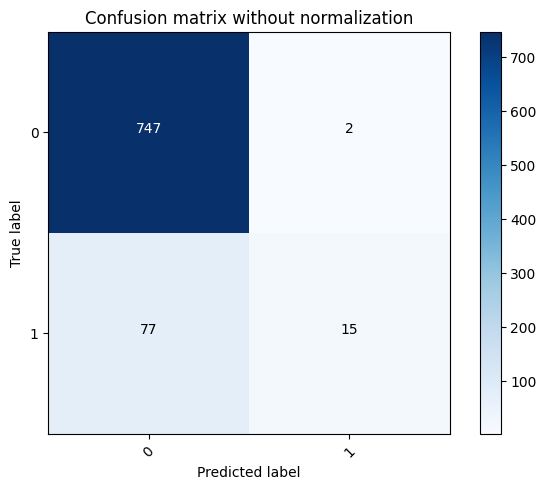

In [34]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()


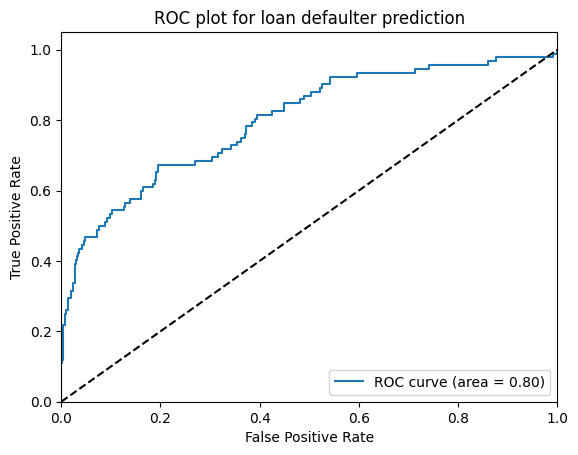

In [36]:
#ROC plot
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()
#Plot ROC
plot_roc(y_test, y_score)

**K-Fold Cross Validation for Logistic Regression**

Doğrulama, modeli eğitmediğiniz bir veri kümesinin belirli bir örneğini ayırma tekniğidir. Modelin görülmeyen verilere karşı ne kadar sağlam olduğunu analiz etmeye yardımcı olur K-Katları Çapraz Doğrulama, verilerimizi k farklı alt kümeye (veya kata) ayırdığımız bir doğrulama tekniğidir. Verilerimizi eğitmek için k-1 alt kümeyi kullanırız ve son alt kümeyi (veya son katlamayı) test verisi olarak bırakırız. Daha sonra her bir katlamaya karşı modelin ortalamasını alır ve modelimizi son haline getiririz. Bundan sonra test kümesine karşı test ederiz.


In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_validate
logreg = LogisticRegression()
kf = KFold(n_splits=5,shuffle=True,random_state=1)
kf_scores = []
xmat = X_sub.to_numpy()
ymat = y.to_numpy()
for train_index, test_index in kf.split(xmat):
    X_train, y_train=xmat[train_index], ymat[train_index]
    logreg.fit(X_train, y_train)
    y_predicted=logreg.predict(X_test)
    kf_scores.append(accuracy_score(y_test, y_predicted))

print(kf_scores)

[0.9084423305588585, 0.9096313912009513, 0.9096313912009513, 0.9084423305588585, 0.9072532699167658]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


**Lojistik regresyon modeli için ortalama doğrulama doğruluğu 0.909'dur**

**2. Model : KNN**
==



In [38]:
#import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
#parameters of gridsearch for KNN:n_neighbors, weights
param_dict= {'n_neighbors':range(3,11,2),
             'weights':['uniform','distance'],
                       'p':[1,2,3,4,5]
                       }
#since this is binary classifier use odd for list of neighbours , with the range function we get k=3,5,7,9
#uniform means that every near neighbour will get the same weightage whether k =3,5,7 or 9
#p means the manhatten or eucledean or higher power distances
#grid search to find the best parameters
from sklearn.model_selection import GridSearchCV
best_model = GridSearchCV(model, param_dict, cv=5)
best_model.fit(X_sub, y)
best_model.best_params_ #{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
best_model.best_score_  #best_score will give the mean score of 5 cv's which is 0.9304399524375743
ypred = best_model.predict(X_sub)
y_score= best_model.predict_proba(X_sub)

In [39]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred)
rs=recall_score(y,ypred, average='macro')
ps=precision_score(y,ypred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)

accuracy score :  0.9402497027348394
precision score :  0.9430006397421091
recall score :  0.6740208877284595


Confusion matrix without normalization
[[3058    6]
 [ 195  105]]


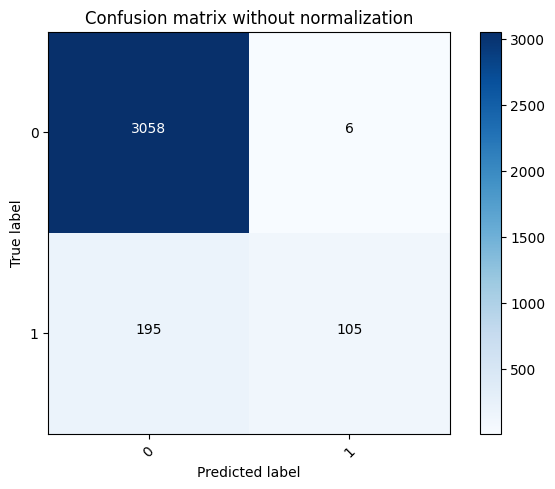

In [40]:
# Compute confusion matrix for KNN
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

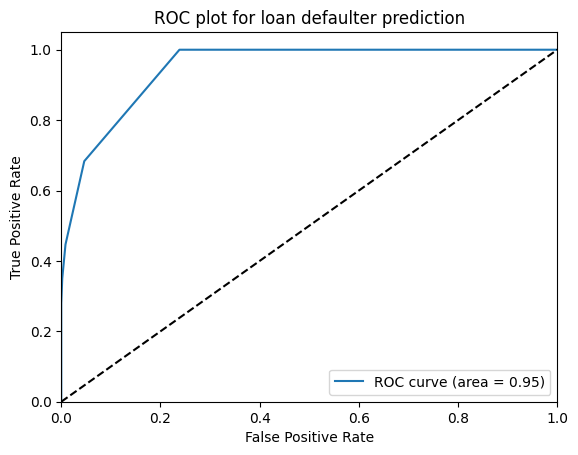

In [41]:
#Plot ROC for KNN
plot_roc(y,y_score)

## **3. Model : Support Vector Classifier**

In [42]:
#import SVC classifier
from sklearn.svm import SVC
model=SVC(probability=True)
param_dict = {'kernel':['rbf','poly'],'degree': [1,2,3], 'C':[0.5,0.75,1],'gamma': [0.01, 0.1, 1]}
#parameters for grid search for SVM are kernel,degree,gamma and C
from sklearn.model_selection import GridSearchCV
#best_model = GridSearchCV(model, param_dict, cv=5, scoring= 'precision')
best_model = GridSearchCV(model, param_dict, cv=5)
best_model.fit(X_sub, y)
best_model.best_params_ # {'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
best_model.best_score_ # 0.9316290130796671
ypred = best_model.predict(X_sub)
y_score= best_model.predict_proba(X_sub)

In [43]:
# import Performance measure for SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred)
rs=recall_score(y,ypred, average='macro')
ps=precision_score(y,ypred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)

accuracy score :  0.9354934601664685
precision score :  0.9669308137762878
recall score :  0.6383333333333333


Confusion matrix without normalization
[[3064    0]
 [ 217   83]]


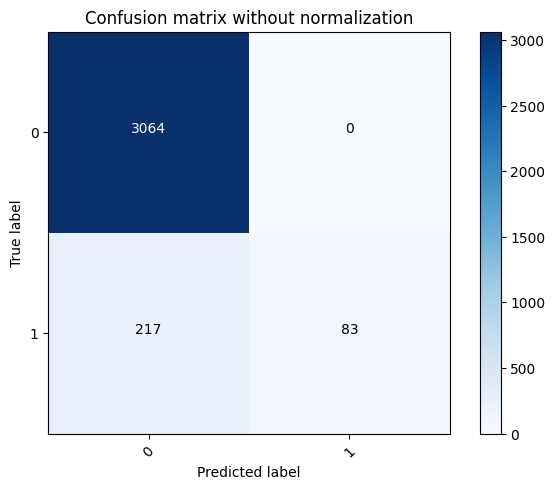

In [44]:
#compute Confusion Matrix for SVC
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

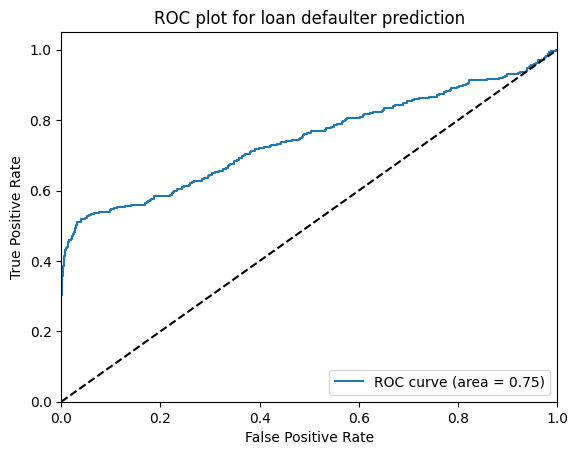

In [45]:
#Plot ROC for SVC
plot_roc(y,y_score)

**4. Model : Decision Tree Classifier**
==

In [46]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
param_dict={'min_samples_split' : range(10,500,20),'max_depth': np.arange(3, 10)}
clf=GridSearchCV(model,param_dict, cv=5)
best_model.fit(X, y)
best_model.best_params_ #
best_model.best_score_ # 0.9316290130796671
ypred = best_model.predict(X)
y_score= best_model.predict_proba(X)
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred)
rs=recall_score(y,ypred, average='macro')
ps=precision_score(y,ypred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)

accuracy score :  0.9268727705112961
precision score :  0.59
recall score :  0.9628398791540785


Confusion matrix without normalization
[[3064    0]
 [ 246   54]]


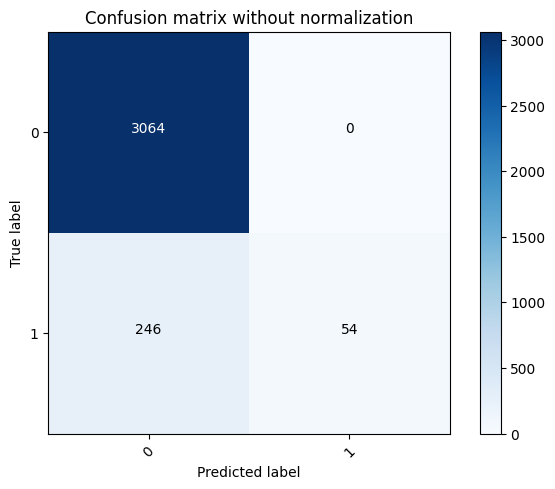

In [47]:
# Compute confusion matrix for Decision Tree
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

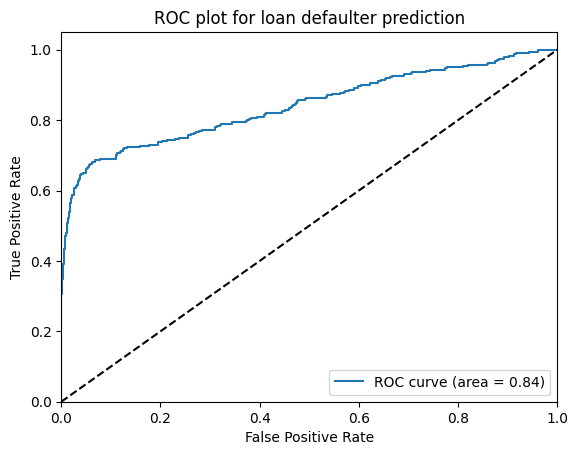

In [48]:
#Plot ROC for Decision Tree
plot_roc(y,y_score)

## **Feature Importance - Özellik Önemi**
Ağaç yöntemleri, sınıfları ayırt etmede etkili bir şekilde yardımcı olan bölünmeleri matematiksel olarak belirler
feature_importances_ Ağaç Tabanlı Sınıflandırıcılarla birlikte gelen dahili bir özelliktir
bölünmelerin belirlenmesinde her bir özelliğin önemine ilişkin bir puan dizisi döndürür
puan ne kadar yüksekse, hedef değişkene yönelik özellik o kadar önemlidir


DEBTINC           0.326948
VALUE             0.109924
CLAGE             0.103477
DELINQ            0.088621
LOAN              0.083562
MORTDUE           0.058204
CLNO              0.057240
YOJ               0.055861
DEROG             0.047683
NINQ              0.025548
JOB_Office        0.014312
JOB_Other         0.007538
REASON_DebtCon    0.006288
REASON_HomeImp    0.004585
JOB_Sales         0.003839
JOB_Mgr           0.003751
JOB_ProfExe       0.002620
JOB_Self          0.000000
dtype: float64


<Axes: title={'center': 'Feature Importance of Decision Tree Model'}>

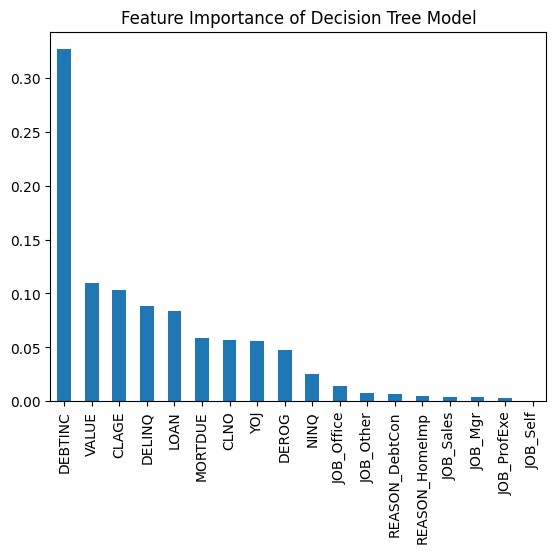

In [49]:
#feature importance of decision tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train) # train the data first for calculating the feature importance
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', title='Feature Importance of Decision Tree Model')


**5. Model : Random Forest Classifier**
==

In [50]:
#import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)
param_dict = { 'n_estimators':[5,10,15],
               'max_depth':[50,60,70],
               'criterion': ['gini','entropy']
              }
#parameters for grid search for Randomforest are n_estimators, max depth and criterion
from sklearn.model_selection import GridSearchCV
best_model = GridSearchCV(model, param_dict, cv=5)
best_model.fit(X, y)
best_model.best_params_ #{'criterion': 'gini', 'max_depth': 60, 'n_estimators': 10}
best_model.best_score_  #0.9200356718192628
ypred = best_model.predict(X)
y_score= best_model.predict_proba(X)

In [51]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
acs=accuracy_score(y,ypred)
rs=recall_score(y,ypred, average='macro')
ps=precision_score(y,ypred, average='macro')
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)

accuracy score :  0.9949464922711059
precision score :  0.9956473678512618
recall score :  0.9731701479547432


Confusion matrix without normalization
[[3063    1]
 [  16  284]]


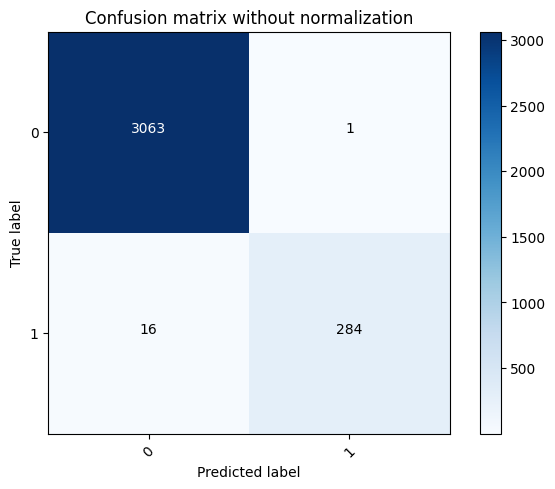

In [52]:
#compute confusion matrix for Random Forest
cm = confusion_matrix(y, ypred)
np.set_printoptions(precision=2)
print('Confusion matrix without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

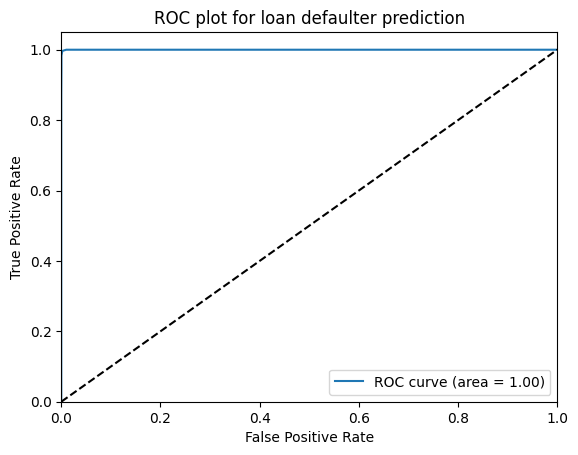

In [53]:
#Plot ROC for Random Forest
plot_roc(y,y_score)

DEBTINC           0.265976
CLAGE             0.105317
DELINQ            0.092708
VALUE             0.089019
MORTDUE           0.078941
CLNO              0.077984
LOAN              0.073790
DEROG             0.053682
YOJ               0.048598
NINQ              0.045687
JOB_Other         0.012382
JOB_Mgr           0.009518
REASON_HomeImp    0.008956
JOB_Office        0.008847
JOB_Sales         0.008739
REASON_DebtCon    0.008208
JOB_ProfExe       0.006714
JOB_Self          0.004934
dtype: float64


<Axes: title={'center': 'Feature Importance of Random Forest Model'}>

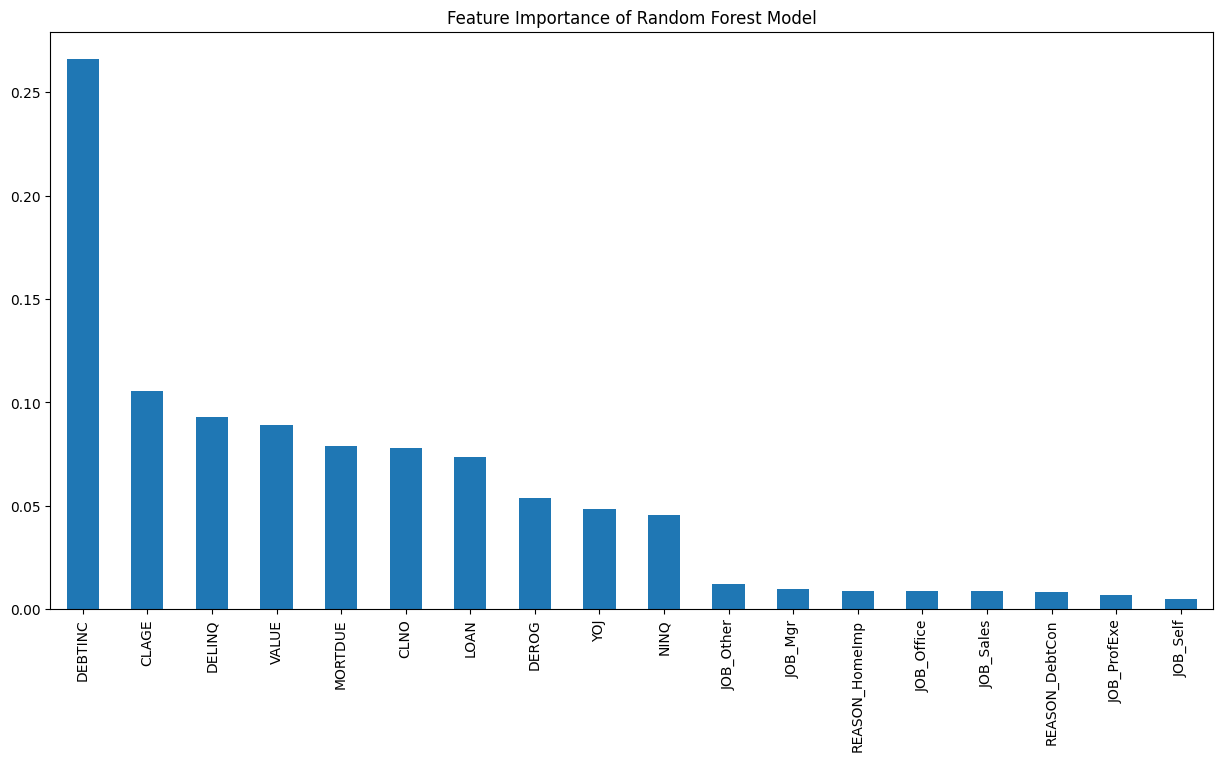

In [54]:
#feature importance of random forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0) #
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train) # train the data first for calculating the feature importance
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)
featimp.plot(kind='bar', figsize=(15,7.5),title='Feature Importance of Random Forest Model')

**Değerlendirme Metriklerinde Model Karşılaştırması**

**Model Comparison on Evaluation Metrics kalın metin**

**Model**|**Accuracy**|**Recall**|**Precision**
---|---|---|---
**Logistic Regression**|0.90606|0.58018|0.89445
**KNN**|0.94024|0.67402|0.94300
**SVC**|0.93549|0.63833|0.96693
**Decision Tree** |0.92687|0.59|0.96283
**Random Forest**|0.99286|0.99611|0.96








Gördüğümüz gibi, doğruluk oranı tüm modellerde %90'ın üzerindedir ve bu da tüm bu modellerin kredi sonucunu tahmin etmede en iyi olduğu izlenimini vermektedir. Bunun nedeni, sıfırların yaklaşık %80 ve birlerin yaklaşık %20 olması nedeniyle hedef değişkenin biraz dengesiz (çarpık) olmasıdır. Bu nedenle, modeli değerlendirmek için kesinlik ve geri çağırma gibi diğer performans ölçütlerini dikkate almak önemlidir. Bu problemde Yanlış Negatif (FN), bir kişinin temerrüde düşmeyeceğini tahmin ettiğimiz halde o kişinin temerrüde düşeceği anlamına gelir. Bu nedenle, FN'lerin sayısını azaltmak önemlidir, aksi takdirde modeller temerrüde düşmesi muhtemel kişilere kredi verilmesine izin verir. Öte yandan, Yanlış Pozitif (FP), modelin temerrüde düşmeyebilecek bir kişinin temerrüde düşeceğini öngördüğü anlamına gelir. Bu büyük bir sorun değildir çünkü günün sonunda borç veren yine de sermaye kaybetme riskinden korunmuş olacaktır. Özetle, bu sorun için FN sayısını azaltmamız gerekir ve bunu başarmak için yüksek Hatırlama oranına sahip bir model seçmeliyiz çünkü aşağıdaki denkleme göre yüksek hatırlama daha az FN anlamına gelir:

Geri Çağırma = TP / (TP + FN), burada TP = Doğru Pozitif ve FN = Yanlış Negatif

Yukarıdaki tablodan, ***Random Forest*** modelinin **0,99'luk en yüksek geri çağırma değerine ve %90'ın üzerinde bir doğruluğa sahip olması nedeniyle** diğer modellere kıyasla en güvenilir model olduğunu görebiliriz.


# ***Sonuç***
Lojistik Regresyon, KNN, Support Vector Classifier, Decision Tree, Random Forest gibi sınıflandırma problemleri için farklı denetimli öğrenme algoritmalarının incelenmesi yapıldı ve  RFE ve Özellik Öneminin hedef değişkeni tahmin etmede en iyi katkıda bulunan değişkenleri nasıl verdiğini araştırdım.
İyi doğruluk elde etmek için GridSearchCV kullanılarak hiper parametre ayarının nasıl yapıldığı da araştırılmıstır.

Lojistik Regresyon, özellik seçimini yaptıktan sonra 0,906'lık iyi bir doğruluk puanı üretir, ancak diğer performans ölçütlerinde (hassasiyet ve geri çağırma) iyi performans göstermemiştir.

KNN iyi bir doğruluk puanına sahiptir ancak hatırlama puanı iyi değildir.

SVC de iyi bir doğruluk puanına sahiptir ancak hatırlama puanı hala kötüdür.

Genel analiz, Random Forest modelinin diğer modellere kıyasla çok iyi çalıştığını ve yaklaşık 0,99'luk en yüksek geri çağırma değerine sahip olduğunu göstermektedir.

Dolayısıyla Random Forest bu sınıflandırma probleminde tüm modellere üstünlük sağlamıştır.

# ***Sources - Kaynaklar***

Ders Notlari        Gunay KARLI-Techno Study

Ders Notlari        Halit VURAL-Techno Study

Introducing Pyhton  Bill LUBANOVIC

Pyhton for Data Science Yuli VASILIEV

Pyhton QuickStart Guide  Robert OLIVER

Kaggle Projects